In [1]:
## Uncomment and Run below code  if you are using google colab
#from google.colab import drive
#drive.mount('/content/drive')


# AllLife Credit Card Customer Segmentation
## Background: 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.
## Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.
Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and
service these customers? Data Description:

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.


## Steps to follow:
1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculateaveragesilhouettescoreforbothmethods.(5marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

In [2]:
## Provide correct path to the input file
path = "./Credit Card Customer Data.xlsx"


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

start_time  = time.time()


In [4]:
orig_data = pd.read_excel(path, "Sheet1")
data = orig_data.copy()

In [5]:
data.sample(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
25,26,68067,18000,1,1,5,10
373,374,92522,6000,4,5,0,1
157,158,61009,17000,1,2,5,8
563,564,96269,69000,5,4,1,0
638,639,17538,153000,8,1,7,1
612,613,94391,157000,9,1,14,1
205,206,99596,17000,1,0,5,5
558,559,83466,40000,6,5,1,2
88,89,38165,8000,1,1,4,8
616,617,89832,96000,10,1,11,2


In [6]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
data.shape

(660, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [10]:
for col in data.columns:
  unique = data[col].is_unique
  if unique:
    print (col + ": all values {} are different".format(data[col].nunique()))
  else:
    print (col + ": has {} unique values".format(data[col].nunique()))


Sl_No: all values 660 are different
Customer Key: has 655 unique values
Avg_Credit_Limit: has 110 unique values
Total_Credit_Cards: has 10 unique values
Total_visits_bank: has 6 unique values
Total_visits_online: has 16 unique values
Total_calls_made: has 11 unique values


In [11]:
data['Customer Key'].value_counts()

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64

In [12]:
data[data['Customer Key'].isin([47437, 37252, 97935, 96929, 50706])].sort_values('Customer Key')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


- Customer Key is expected to be uniquie, but it's not. The Bank should use Sl_No to label customers to avoid customer misidentification
- All the feature columns are numerical (integer)
- Value distributios of all the feature columns are right skewed
- There is no missing data

# Exploratory data analysis

In [13]:
feature_columns = data.columns[2:]

In [14]:
feature_columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

## Univariate analysis

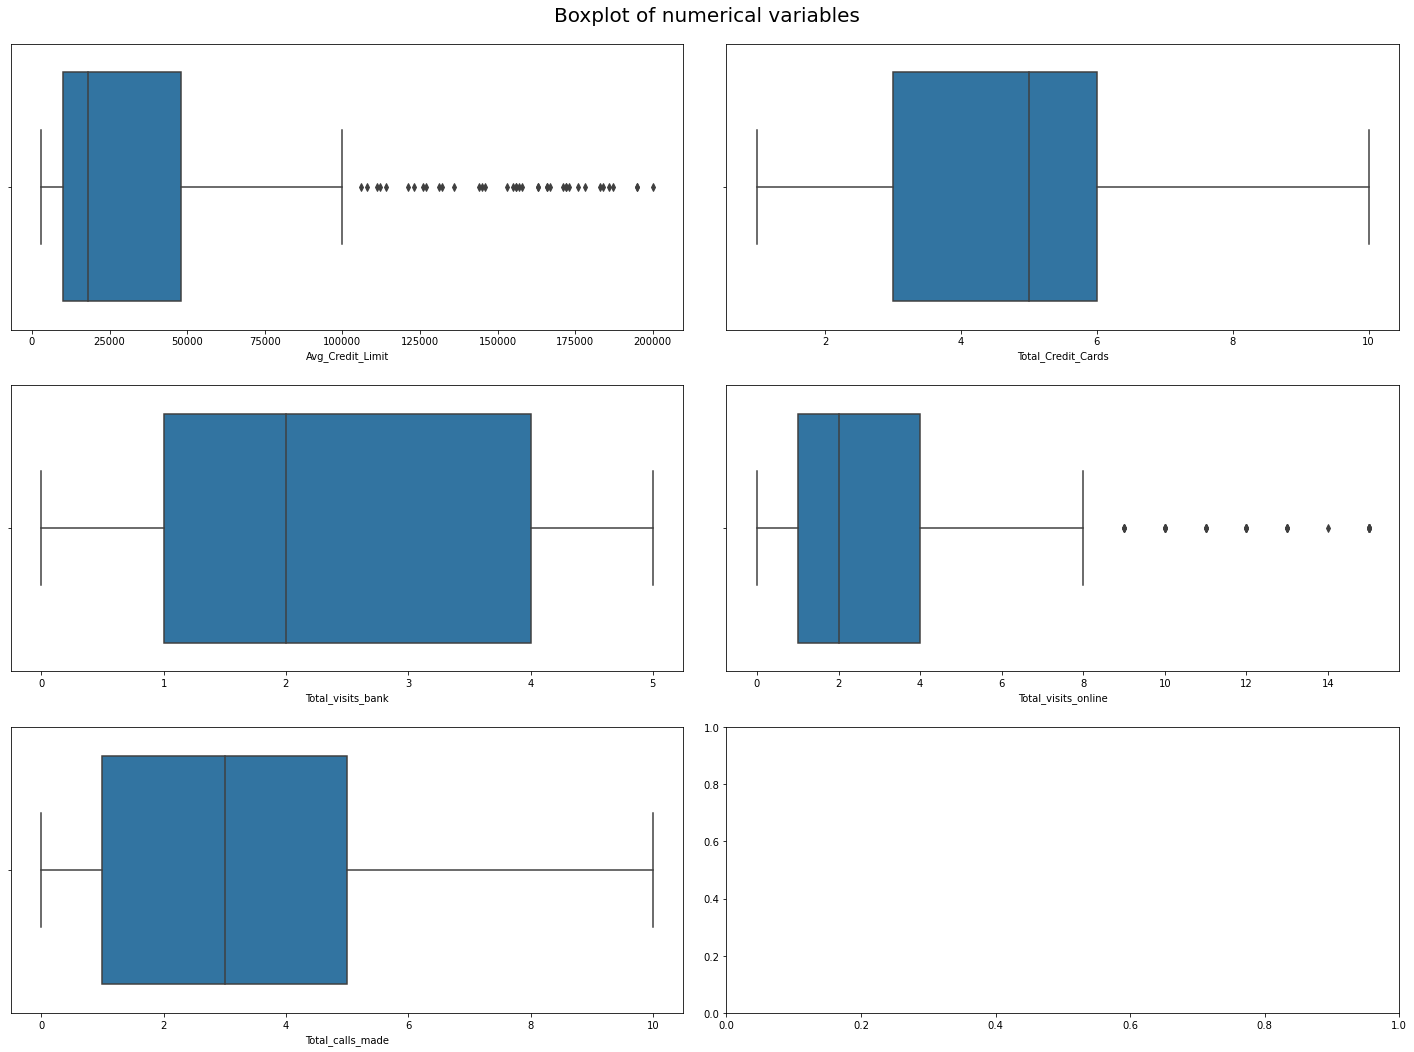

In [15]:
# selecting numerical columns

fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.boxplot(ax=axes[ii][0],x=data[feature_columns[counter]])
    counter = counter+1
    if counter != 5:
        sns.boxplot(ax=axes[ii][1],x=data[feature_columns[counter]])
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

There are upper outliers in Avg_Credit_Limit, which indicates customers with high credit limit

There are upper outliers in Total_visits_online, which indicate customers often visisiting bank's web site

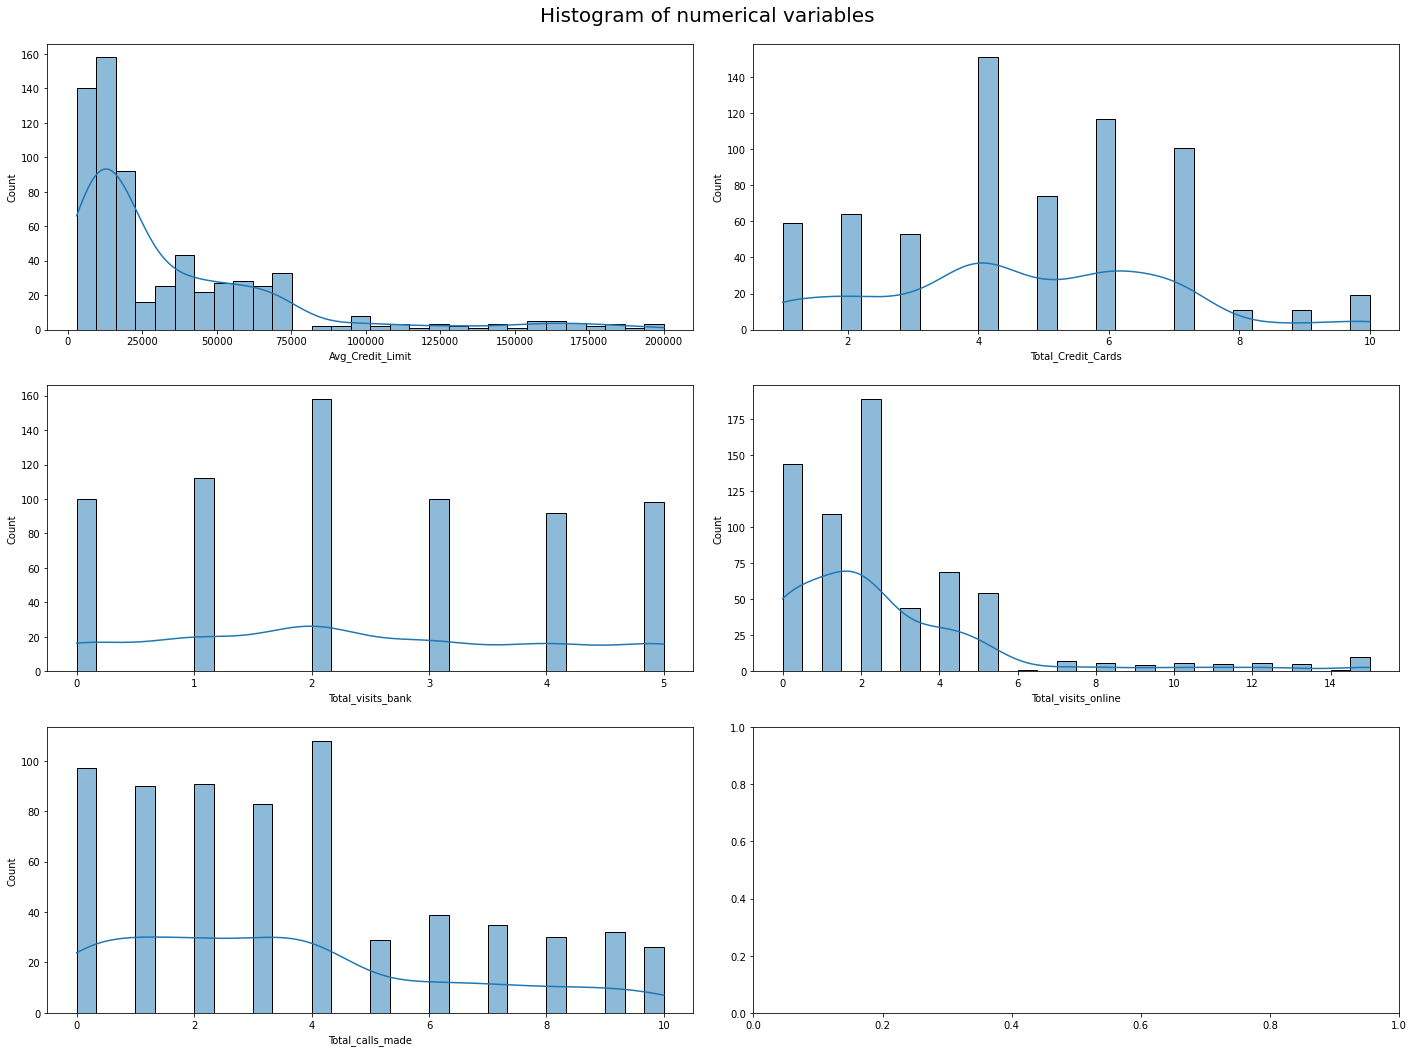

In [16]:
# select numerical columns
fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    sns.histplot(ax=axes[ii][0],x=data[feature_columns[counter]], bins=30, kde=True)
    counter = counter+1
    if counter != 5:
        sns.histplot(ax=axes[ii][1],x=data[feature_columns[counter]], bins=30, kde=True)
        counter = counter+1
    else:
        pass

fig.tight_layout(pad=2.0)

Avg_credit_limit is right skewed

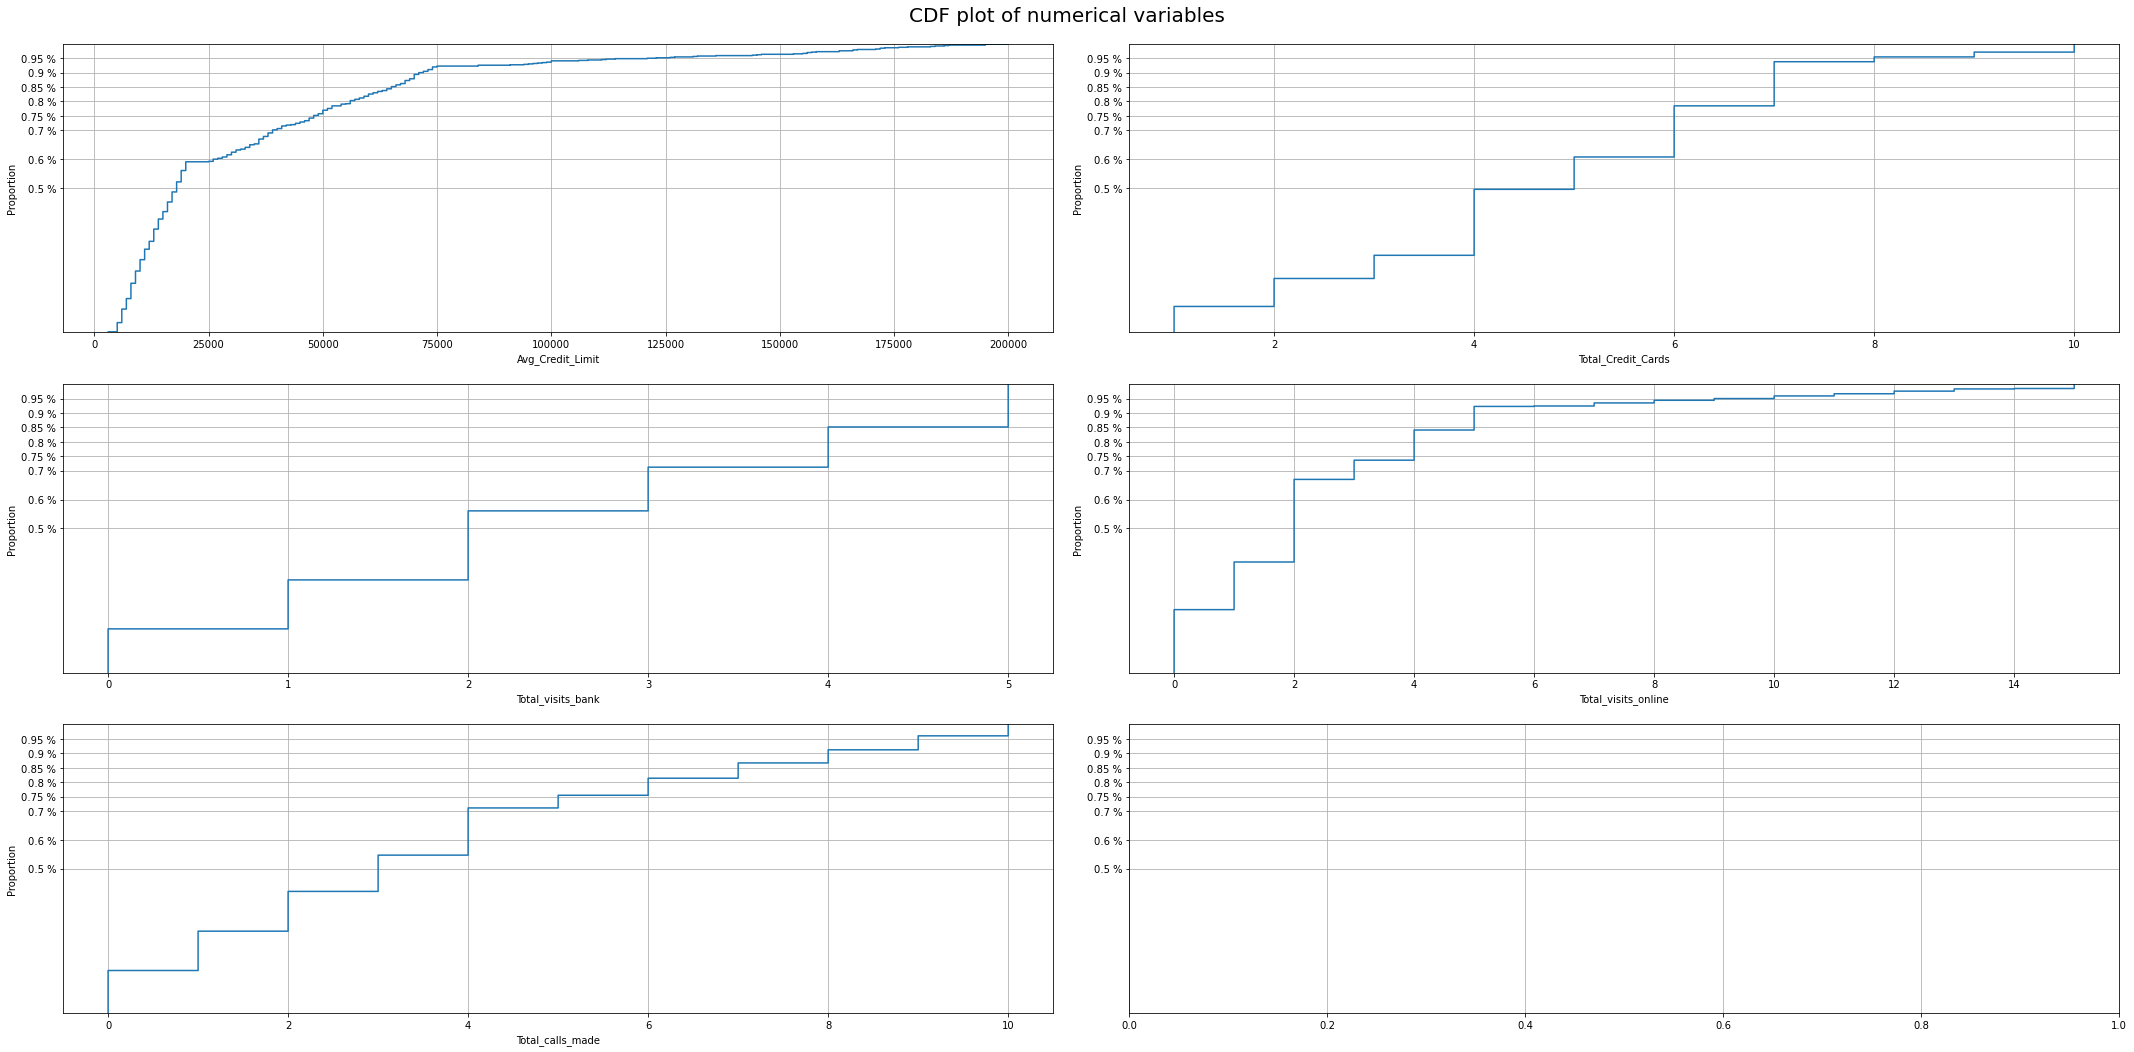

In [17]:
# select numerical columns
y_ticks = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
y_ticklabels = [f'{t} %' for t in y_ticks]

fig, axes = plt.subplots(3, 2,  figsize=(30, 15))
fig.suptitle('CDF plot of numerical variables', fontsize=20)
counter = 0
for ii in range(3):
    axes[ii][0].yaxis.set_ticks(y_ticks)
    axes[ii][0].yaxis.set_ticklabels(y_ticklabels)
    axes[ii][0].yaxis.grid(True)
    axes[ii][0].xaxis.grid(True)

    axes[ii][1].yaxis.set_ticks(y_ticks)
    axes[ii][1].yaxis.set_ticklabels(y_ticklabels)
    axes[ii][1].yaxis.grid(True)
    axes[ii][1].xaxis.grid(True)

    sns.ecdfplot(ax=axes[ii][0],x=data[feature_columns[counter]])
    counter = counter+1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1],x=data[feature_columns[counter]])
        counter = counter+1
    else:
        pass


fig.tight_layout(pad=2.0)

60% of customers have credit limit less then 25,000; 5% of customers have credit limit 100,000 and higher

70% of customers had 0-2 online visits, 85% had 0-5 visits

50% of customers have 1-5 cards, 50% have more then 5 cards

55% of customers made 0-4 calls, 45% made 5-10 calls

## Bivariate analysys

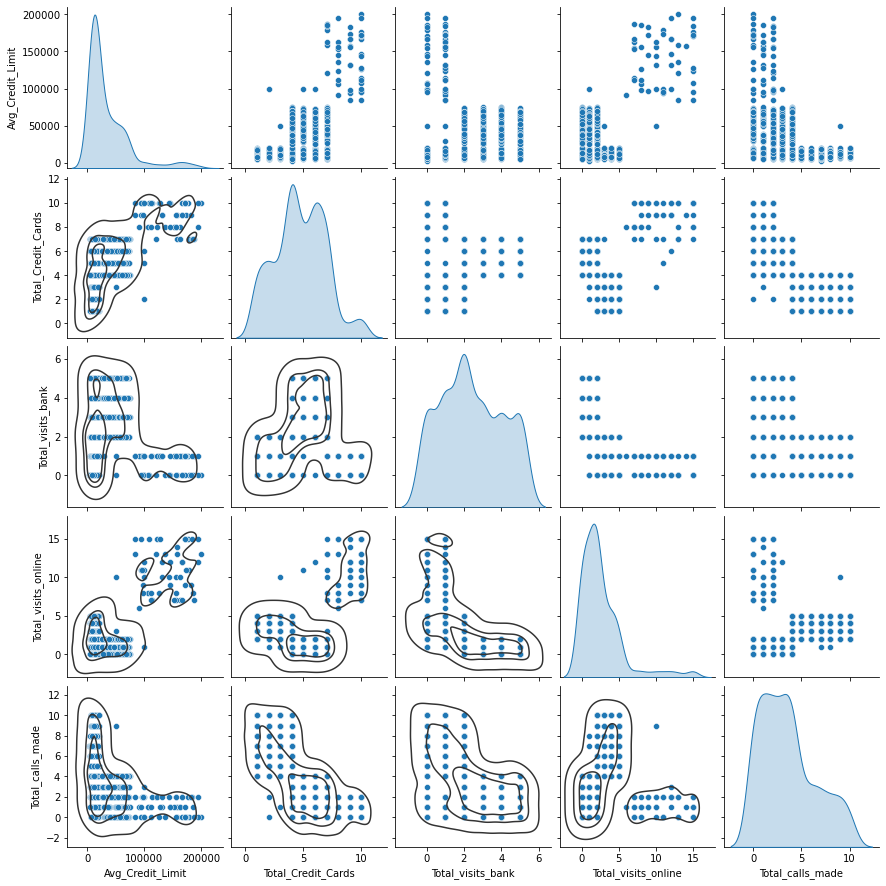

In [18]:
g = sns.pairplot(data[feature_columns], diag_kind='kde')
g.map_lower(sns.kdeplot, levels=4, color=".2")

We can see potential clusters on scatterplots with KDE:

On Total_call_made vs Total_visits_online we can see 2 groups of customers: those who prefer to make phone calls and those who prefer online banking

On Avg_Credit_Limit vs Total_visits_online we can sse 2 grouls of customers: frequent online banking users with high limit and infrequent online users with lower limit

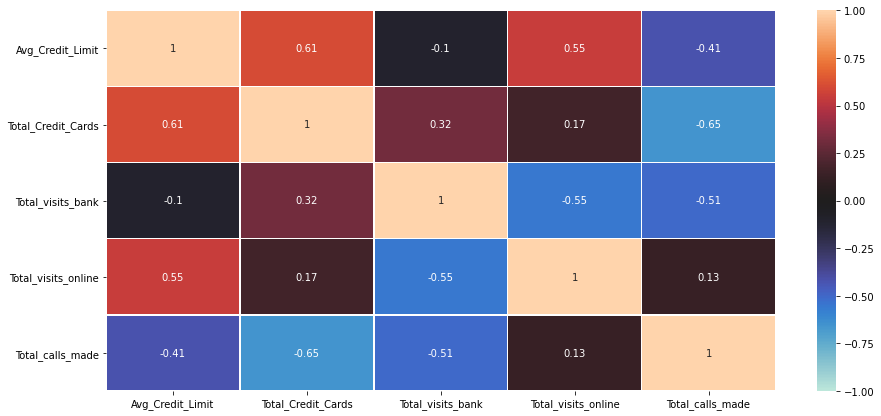

In [19]:
plt.figure(figsize=(15,7))

sns.heatmap(data[feature_columns].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)            

plt.show()

- There is a strong negative correlation between Total_visits_bank and Total_visits_online. There is a strong negative correlation between Total_visits_bank and Total_calls_made. Customers either visit banks offices in person or do their business online/over the phone
- There is no strong linear correlation between Total_calls_made and Total_visits_online 
- There is a strong positive correlation between Avg_Credit_Limit and Total_Credit_Cards, which is understandable
- There is a strong negative correlation between Total_Credit_Cards and Total_calls_made
- There is a strong positive correlation betwee Avg_Credit_limit and Total_visits_online


# Kmeans Clustering

In [20]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.metrics import silhouette_score
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [21]:
# Scaling the dataset before clustering
scaler=StandardScaler()
subset=data[feature_columns].copy()
subset_scaled=scaler.fit_transform(subset) 

# Creating a dataframe of the above results
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9429951888252041
Number of Clusters: 7 	Average Distortion: 0.9093922362871227
Number of Clusters: 8 	Average Distortion: 0.8902851758638373


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

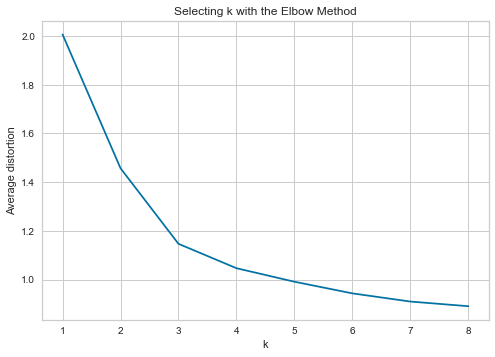

In [22]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Appropriate number of clusters semms to be 3, maybe 4

For n_clusters = 2, silhouette score is 0.41842496663230405)
For n_clusters = 3, silhouette score is 0.5157182558882754)
For n_clusters = 4, silhouette score is 0.35566706193773706)
For n_clusters = 5, silhouette score is 0.272689879182253)
For n_clusters = 6, silhouette score is 0.2558637700771479)
For n_clusters = 7, silhouette score is 0.24873549653927665)
For n_clusters = 8, silhouette score is 0.2273180541698687)
For n_clusters = 9, silhouette score is 0.21616806088159693)


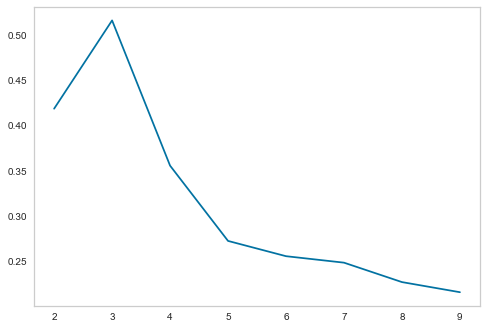

In [23]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

Silhouette score for 3 is high, so we will choose 3 as value of k.

SilhouetteVisualizer(ax=<AxesSubplot:>,
                     estimator=KMeans(n_clusters=3, random_state=0))

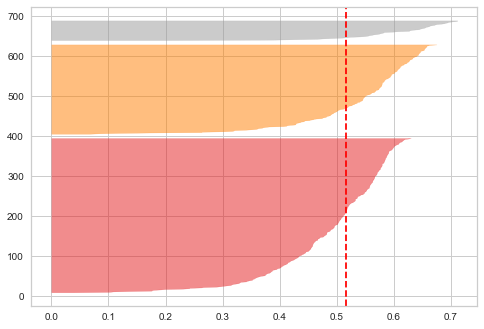

In [24]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 0))
visualizer.fit(subset_scaled_df)    
visualizer

SilhouetteVisualizer(ax=<AxesSubplot:>,
                     estimator=KMeans(n_clusters=4, random_state=0))

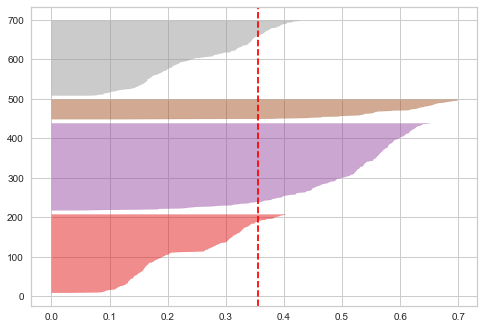

In [25]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 0))
visualizer.fit(subset_scaled_df)    
visualizer

In [26]:
# lets us take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [27]:
data['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [28]:
cluster_profile = data.groupby('K_means_segments').mean()

In [29]:
cluster_profile['count_in_each_segments'] = data.groupby('K_means_segments')['Sl_No'].count().values

In [30]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,,,
0,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,224
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [31]:
## Let's give the classes meaningful names
class_names = ['Conservative in-person visitors', 'Phone callers', 'Respectable Online Customers']
cluster_profile['class_name'] = class_names
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments,class_name
K_means_segments,,,,,,,,,
0,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,386,Conservative in-person visitors
1,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,224,Phone callers
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,50,Respectable Online Customers


In [32]:
replace_dict = {}
for i in range(0, len(class_names)):
  replace_dict[i] = class_names[i] 

In [33]:
data['class_name'] = kmeans.labels_
data = data.replace({'class_name': replace_dict})

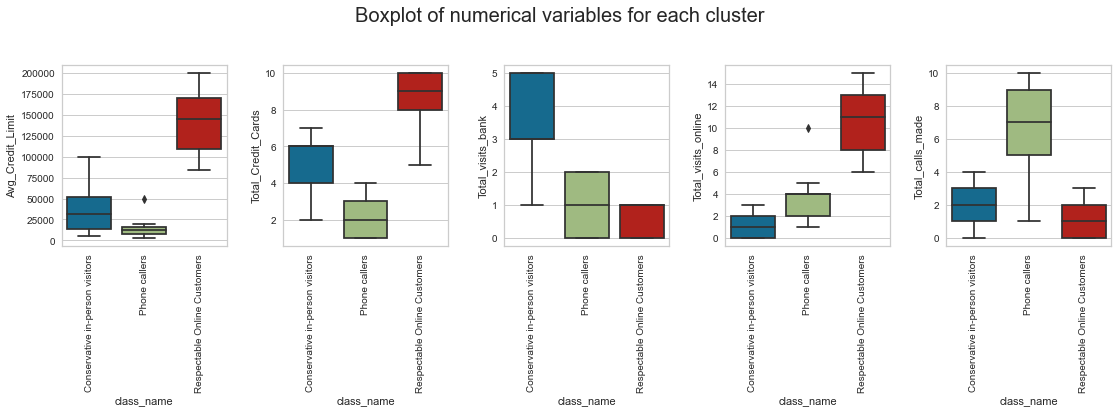

In [34]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):  
  sns.boxplot(ax=axes[ii],y=data[feature_columns[counter]],x=data['class_name'])
  axes[ii].set_xticklabels(axes[ii].get_xticklabels(), rotation=90)
  counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0: "Conservative in-person visitors"**:
    - These customers most frequently visit bank offices in-person and least frequently using online services
    - Their Credit limit is close to median and they have usually have 4-6 cards
   
- **Cluster 1: "Phone callers"**:
    - These customers frequently make phone calls
    - They have credit limit below median and 1-3 cards    
    
- **Cluster 2: "Respectable Online Customers"**:
    - They have high credit limits and usually 8-10 cards
    - They prefer online banking more then other groups


# Hierarchial clustering

In [35]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from scipy.stats import zscore

In [36]:
# Creating a dataframe of the above results
subset_scaled_df2=pd.DataFrame(subset_scaled,columns=subset.columns)

In [37]:
# This class stores distance, linkage and copehet metric
# We overload < operator to be able to sort objects of this class 
# by copehet metric and __str__ method to be able to print an object as string 
class copehetMetric:
  distance_ = ""
  linkage_  = ""
  metric_   = 0.0
  def __str__(self):
    return "distance: {0}, linkage: {1}: metric: {2}".format(self.distance_, \
                                                               self.linkage_,\
                                                               self.metric_)
  def __lt__(self, other):
    return self.metric_ < other.metric_;


## Explore different destance metrics and linkage methods

In [38]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
distance_metrics = ['chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']

metric_list = []
for dm in distance_metrics:
  for lm in linkage_methods:
    Z = linkage(subset_scaled_df2, metric=dm, method=lm)
    c, coph_dists = cophenet(Z , pdist(subset_scaled_df2))

    cm = copehetMetric()
    cm.distance_ = dm;
    cm.linkage_  = lm
    cm.metric_   = c
    metric_list.append(cm)

In [39]:
# For euclidean distance measure add ward linkage
linkage_methods = ['ward', 'single', 'complete', 'average', 'weighted']
distance_metrics = ['euclidean']

for dm in distance_metrics:
  for lm in linkage_methods:
    Z = linkage(subset_scaled_df2, metric=dm, method=lm)
    c, coph_dists = cophenet(Z , pdist(subset_scaled_df2))
    cm = copehetMetric()
    cm.distance_ = dm;
    cm.linkage_  = lm
    cm.metric_   = c
    metric_list.append(cm)

In [40]:
metric_list.sort(reverse=True)

for cm in metric_list:
  print(str(cm))



distance: euclidean, linkage: average: metric: 0.8977080867389372
distance: chebyshev, linkage: average: metric: 0.8974159511838106
distance: cityblock, linkage: average: metric: 0.896329431104133
distance: chebyshev, linkage: weighted: metric: 0.8913624010768603
distance: euclidean, linkage: weighted: metric: 0.8861746814895477
distance: cityblock, linkage: weighted: metric: 0.8825520731498188
distance: cityblock, linkage: complete: metric: 0.8731477899179829
distance: euclidean, linkage: complete: metric: 0.8599730607972423
distance: chebyshev, linkage: complete: metric: 0.8533474836336782
distance: mahalanobis, linkage: average: metric: 0.8326994115042134
distance: mahalanobis, linkage: weighted: metric: 0.7805990615142515
distance: euclidean, linkage: ward: metric: 0.7415156284827493
distance: euclidean, linkage: single: metric: 0.7391220243806552
distance: chebyshev, linkage: single: metric: 0.7382354769296767
distance: cityblock, linkage: single: metric: 0.7252379350252723
distan

Cophenet index is maximum with euclidean distance and average linkage

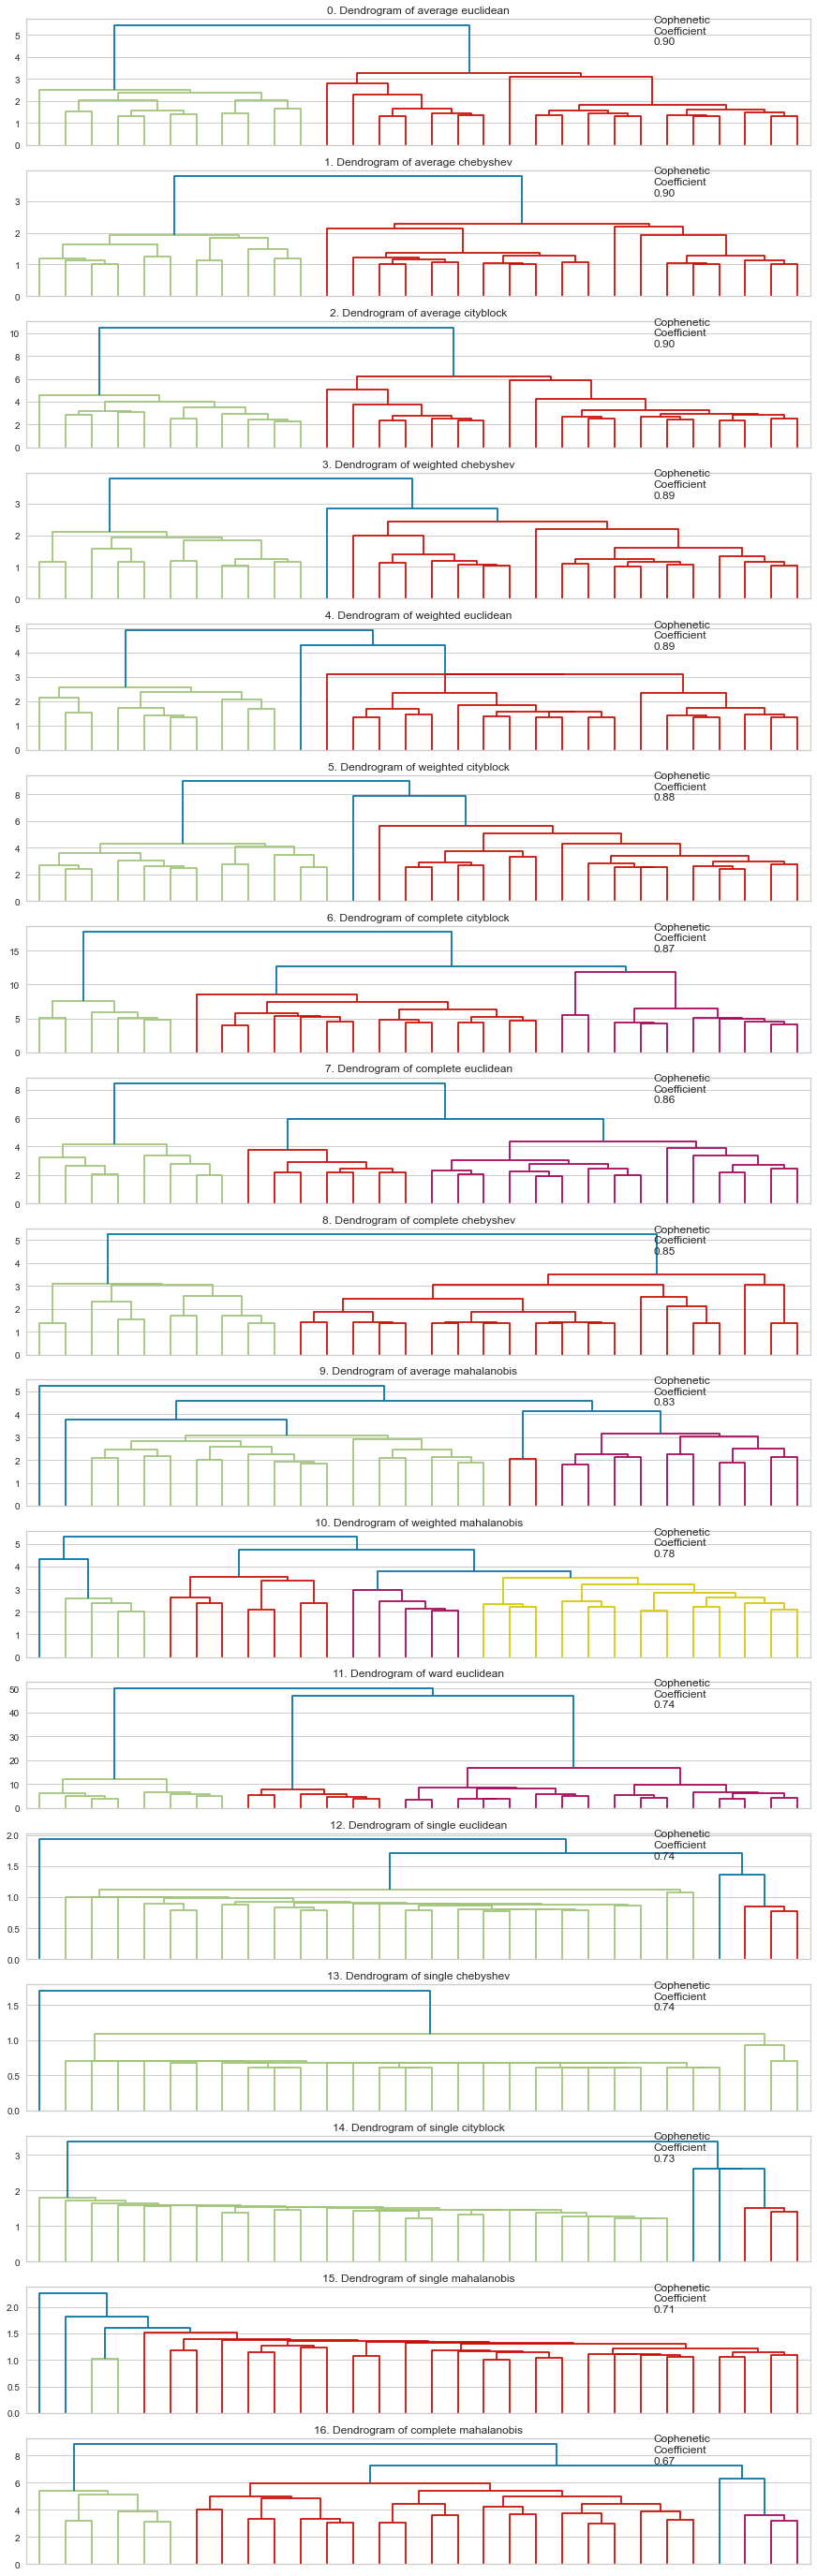

In [41]:

# Create a subplot image
fig, axs = plt.subplots(len(metric_list), 1, figsize=(15, 50))

# Enumerate through the list of all methods above
# Get linkage, plot dendrogram, calculate cophenetic coefficient
for i, cm in enumerate(metric_list):
  Z = linkage(subset_scaled_df2, metric=cm.distance_, method=cm.linkage_)
  dendrogram(Z, ax=axs[i], no_labels=True, truncate_mode='lastp')
  axs[i].set_title('{}. Dendrogram of {} {}'.format(i, cm.linkage_, cm.distance_))
  coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df2))
  axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')


**Observations**
- Out of all the dendrogram we saw, it is clear that dendrogram #11 with ward linkage method gave us separate and distinct clusters
- 3 cluster would be appropriate number of cluster from dendrogram with ward linkage method  

## Hierarchial clustering model

In [42]:
Z = linkage(subset_scaled_df2, 'ward', metric='euclidean')

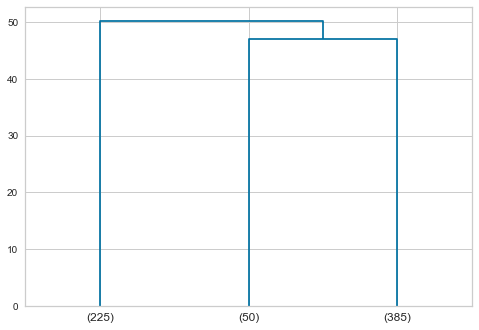

In [43]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [44]:
max_d = 45
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [45]:
silhouette_score(subset_scaled_df2,clusters)

0.5147639589979518

Silhouette score for hierarhial clustering is similar to K-means clustering score

In [46]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [47]:
from sklearn.cluster import AgglomerativeClustering 


In [48]:
HCmodel = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
HCmodel.fit(subset_scaled_df2)
ip install --upgrade --force --no-dependencies https://github.com/apple/tensorflow_macos/releases/download/v0.1alpha3/tensorflow_macos-0.1a3-cp38-cp38-macosx_11_0_arm64.whl https://github.com/apple/tensorflow_macos/releases/download/v0.1alpha3/tensorflow_addons_macos-0.1a3-cp38-cp38-macosx_11_0_arm64.wh['HC_Clusters'] = HCmodel.labels_
data['HC_Clusters'] = HCmodel.labels_

In [49]:
cluster_profile = data.groupby('HC_Clusters').mean()
cluster_profile['count_in_each_segments'] = data.groupby('HC_Clusters')['Sl_No'].count().values

In [50]:
# lets display cluster profile
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,
0,417.862338,54895.745455,33851.948052,5.516883,3.493506,0.979221,1.994805,0.000000,385
1,118.617778,55213.568889,12151.111111,2.422222,0.937778,3.546667,6.857778,0.995556,225
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50


In [51]:
## Let's give the classes meaningful names
## They will be the same as for K-mean clustering
class_names = ['Conservative in-person visitors', 'Phone callers', 'Respectable Online Customers']
cluster_profile['HC_class_name'] = class_names
cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments,HC_class_name
HC_Clusters,,,,,,,,,,
0,417.862338,54895.745455,33851.948052,5.516883,3.493506,0.979221,1.994805,0.000000,385,Conservative in-person visitors
1,118.617778,55213.568889,12151.111111,2.422222,0.937778,3.546667,6.857778,0.995556,225,Phone callers
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50,Respectable Online Customers


In [52]:
data['HC_class_name'] = HCmodel.labels_
data = data.replace({'HC_class_name': replace_dict})

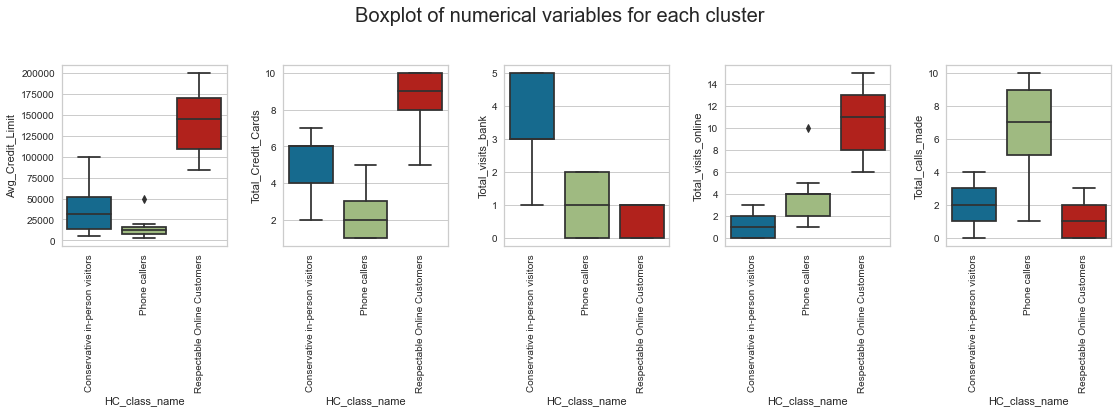

In [53]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):  
  sns.boxplot(ax=axes[ii],y=data[feature_columns[counter]],x=data['HC_class_name'])
  axes[ii].set_xticklabels(axes[ii].get_xticklabels(), rotation=90)
  counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0: "Conservative in-person visitors"**:
    - These customers most frequently visit bank offices in-person and least frequently using online services
    - Their Credit limit is close to median and they have usually have 4-6 cards
   
- **Cluster 1: "Phone callers"**:
    - These customers frequently make phone calls
    - They have credit limit below median and 1-3 cards    
    
- **Cluster 2: "Respectable Online Customers"**:
    - They have high credit limits and usually 8-10 cards
    - They prefer online banking more then other groups


# Clusters Comparison

Numerical variable distributions look very similar to those for K-mean clustering. Let's check if there are any difference in clustring result

In [54]:
data[data['HC_class_name'] != data['class_name']]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,class_name,HC_Clusters,HC_class_name
288,289,49331,7000,5,2,2,4,0,Conservative in-person visitors,1,Phone callers


Check how numerical variables distributed between clusters

In [55]:
cluster_profile_sum = data.groupby('K_means_segments').sum()

In [56]:
cluster_profile_sum['count_in_each_segments'] = data.groupby('K_means_segments')['Sl_No'].count().values

In [57]:
cluster_profile_sum.style.highlight_max(color = 'lightgreen', axis = 0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters,count_in_each_segments
K_means_segments,,,,,,,,,
0,161166,21184193,13040000,2129,1347,379,772,1,386
1,26400,12373722,2727000,540,209,796,1539,224,224
2,30564,2835438,7052000,437,30,545,54,100,50


### Insights
- Only one customer was placed to different clusters by K-mean Hierarchial clustering methods
- Customers from segment 1 make 2/3 of all phone calls, being only 1/3 of total number of customers
- Customers from cluster 0 make 85% of bank in-person visits, being only 58% of total number of customers
- 4/5 of online visits are made by customers from clusters 1 and 2, while their combined number is ~40% of total
- Customers of segment 2 have 1/3 of total credit limist, being only 7.5% of total number of customers. 

# Conclusion and Business Recommendation

### Conclusion

Both K-**mean** an hierarchial clustering method returned 3 clusters. Distribution of customers to clusters made by the two different clustering methods is almost identical (there is a different in only one customer). 

- **Cluster 0: "Conservative in-person visitors"**:
    - These customers most frequently visit bank offices in-person and least frequently using online services
    - Their Credit limit is close to median and they have usually have 4-6 cards 
   
- **Cluster 1: "Phone callers"**:
    - These customers frequently make phone calls
    - They have credit limit below median and 1-3 cards    
    
- **Cluster 2: "Respectable Online Customers"**:
    - They have high credit limits and usually 8-10 cards
    - They prefer online banking more then other groups

### Bisiness recommendations:
- Marketing campaingns and customer support oriented to customers with hight credit limits and many cards should be made online
- Marketing campaingns and customer support oriented to customers with low credit limits and a few cards should be made over the phone and online
- Marketing campaingns and customer support oriented to customers with median credit limits and 4-6 cards should be made on site




In [58]:
end_time = time.time()
print("Elapsed time {}".format(end_time - start_time))


Elapsed time 9.465764284133911


In [59]:
subset_scaled_df2.columns


Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'HC_Clusters'],
      dtype='object')

/Users/olegkulikov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/olegkulikov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/olegkulikov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


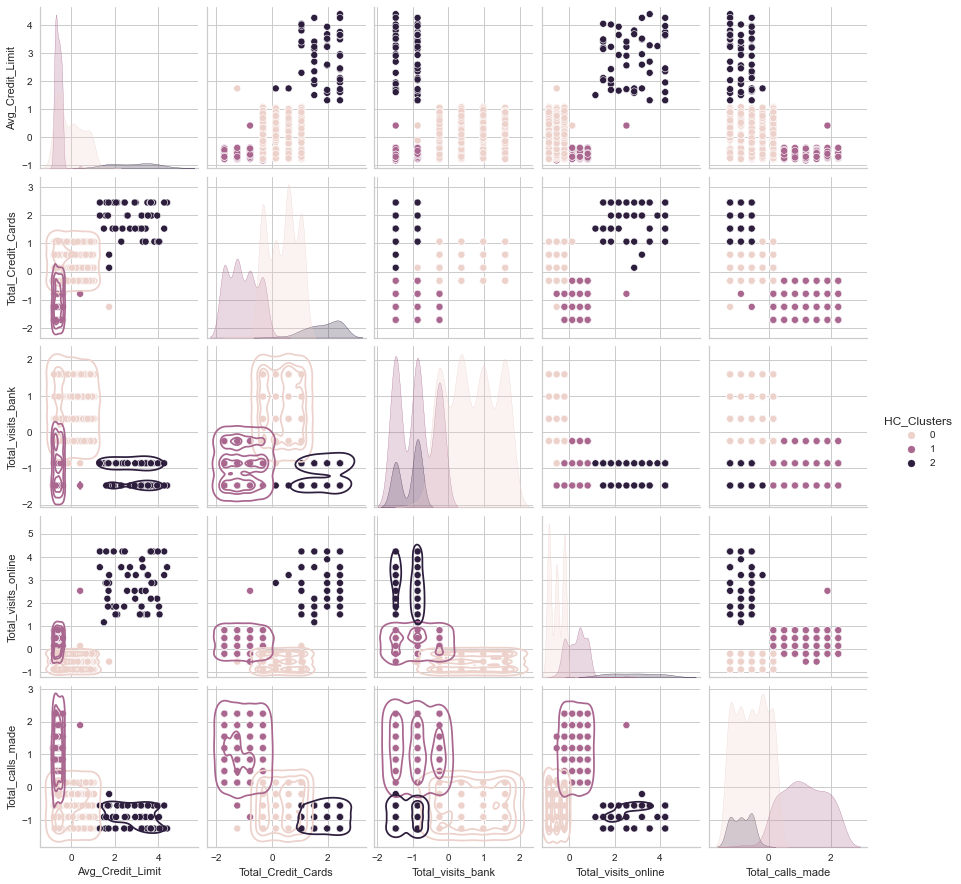

In [60]:

g = sns.pairplot(subset_scaled_df2, diag_kind='kde', hue='HC_Clusters')
g.map_lower(sns.kdeplot, levels=4, color=".2")